In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import seaborn as sns
import numpy as np
import math

'''
Want to: import csv files of distances
Store all values in dataframe
For single distances - Extract times from file names, sort and then import files, add time column and log distance column, then plot
For closest 3 - Extract times, sort and then import, measure all distances for each cell and extract closest 3, create log of closest 3 and time DF and plot'''

def PlotSingleDistances(folder, extension, ax, log = False):
    
    times = GetTimes(folder, extension)
    
    file_frame = Generate_dfs(folder, extension, times)
    
    if log == True:
        logs = []
        for length in file_frame['Length']:
            logs.append(math.log(length))
        file_frame['Log Lengths'] = logs    
        
        b = sns.boxplot(x = 'Time', y = 'Log Lengths', data = file_frame , ax = ax)
        ax.set_ylim(-1.7,1.6)
    else:
        b = sns.boxplot(x = 'Time', y = 'Length', data = file_frame, ax = ax)
        ax.set_ylim(0,4.5)
    
    

def GetTimes(folder, extension):
    filenames = glob.glob("msresist/data/Distances/" + folder + "/*.csv")
    filename_prefix = "msresist/data/Distances/" + folder + "/Results_" + extension + "_"
    filename_suffix = ".csv"
    
    times = []
    for file in filenames:
        time = int(file[len(filename_prefix):-len(filename_suffix)])
        times.append(time)
    times = sorted(times)
    return times

def Generate_dfs(folder, extension, times):
    file_list = []
    for time in times:
        file = pd.read_csv("msresist/data/Distances/" + folder + "/Results_" + extension + "_" + str(time) + ".csv")
        file['Time'] = time
        file_list.append(file)
    file_frame = pd.concat(file_list)
    return file_frame
                           


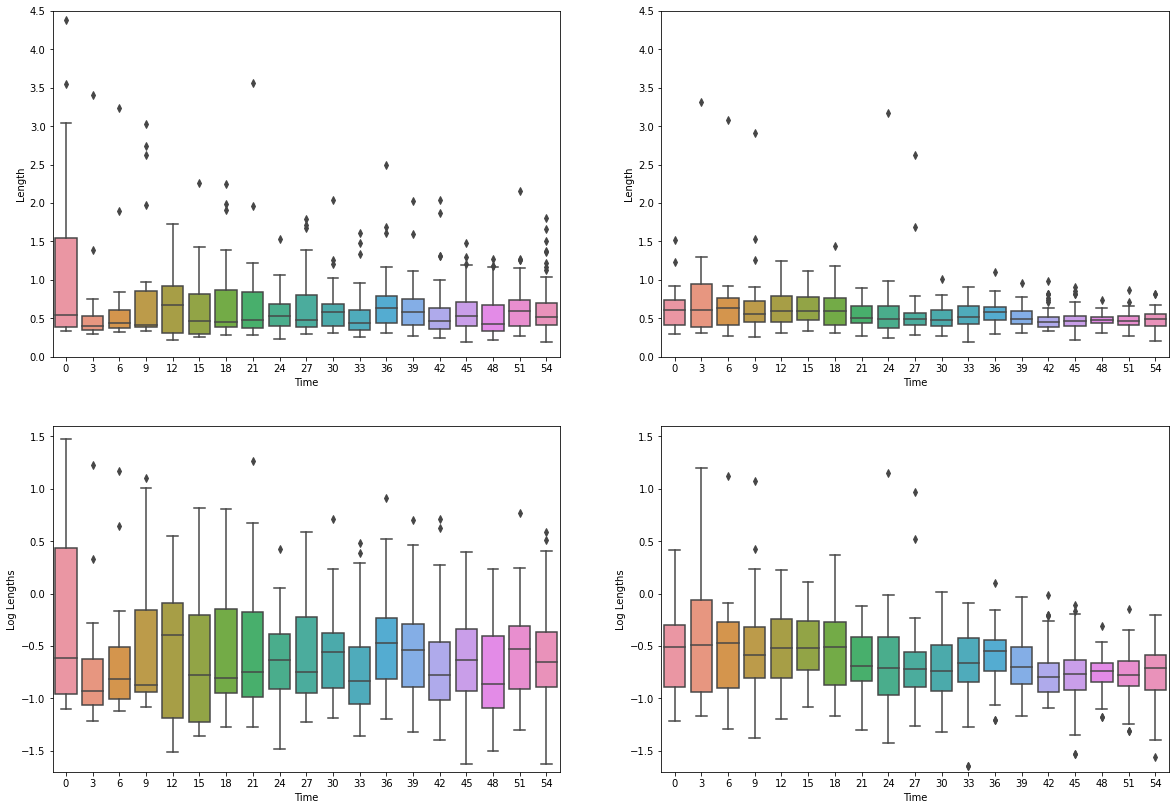

In [30]:
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize = (20,14))
PlotSingleDistances('PC9_UT', 'ut', ax[0,0])
PlotSingleDistances('PC9_E', 'e', ax[0,1])
PlotSingleDistances('PC9_UT', 'ut', ax[1,0], True)
PlotSingleDistances('PC9_E', 'e', ax[1,1], True)